In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np

In [5]:
### read data 
participant = 'p0'
fileName = './data/'+ str(participant)+'.csv'
rawdata = pd.read_csv(fileName, sep=",")
rawdata.shape
rawdata.describe() # simple describe like count, mean and std


./data/p0.csv


,time,S1_D2_7.555000e+02nm,S3_D2_7.555000e+02nm,S4_D2_7.555000e+02nm,S7_D7_7.555000e+02nm,S8_D7_7.555000e+02nm,S10_D7_7.555000e+02nm,S1_D1_7.555000e+02nm,S2_D1_7.555000e+02nm,S3_D1_7.555000e+02nm,...,S9_D8_7.555000e+02nm,S7_D5_7.555000e+02nm,S6_D5_7.555000e+02nm,S8_D5_7.555000e+02nm,S2_D3_7.555000e+02nm,S3_D3_7.555000e+02nm,S5_D3_7.555000e+02nm,S6_D6_7.555000e+02nm,S8_D6_7.555000e+02nm,S9_D6_7.555000e+02nm
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,...,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000
mean,823.293453,-0.032669,-0.029628,-0.038133,-0.034734,-0.022782,-0.034356,-0.033902,-0.020889,-0.021634,...,-0.018200,-0.031310,-0.014812,-0.017939,-0.022007,-0.018475,-0.019878,-0.014193,-0.023987,-0.014837
std,475.352771,0.501266,0.459294,0.584961,0.533433,0.349352,0.526409,0.520137,0.321129,0.334535,...,0.280398,0.482513,0.235592,0.276699,0.338963,0.304068,0.311469,0.221308,0.394263,0.229831
min,0.000000,-9.040000,-8.210000,-10.600000,-9.610000,-6.280000,-9.490000,-9.370000,-5.770000,-5.980000,...,-5.040000,-8.680000,-4.080000,-4.940000,-6.080000,-5.140000,-5.480000,-3.930000,-6.630000,-4.140000
25%,412.000000,-0.014700,-0.010200,-0.013900,-0.017500,-0.017100,-0.021075,-0.013900,-0.014900,-0.008840,...,-0.015900,-0.017200,-0.024200,-0.013200,-0.014600,-0.024500,-0.026900,-0.023700,-0.056700,-0.018600
50%,823.000000,-0.000186,-0.000612,0.001160,0.002380,0.001465,0.000604,0.000904,-0.000600,0.000393,...,0.000541,0.000884,-0.000692,0.000466,-0.000992,-0.000403,-0.001385,0.000625,-0.001560,-0.001065
75%,1230.000000,0.013600,0.013200,0.013500,0.019800,0.018275,0.020000,0.014800,0.011500,0.010400,...,0.014600,0.017100,0.023300,0.012800,0.009978,0.031200,0.020900,0.023500,0.066000,0.016400
max,1650.000000,1.300000,1.200000,1.520000,1.380000,0.886000,1.330000,1.330000,0.837000,0.877000,...,0.752000,1.250000,0.608000,0.700000,0.890000,0.849000,0.788000,0.580000,0.954000,0.626000


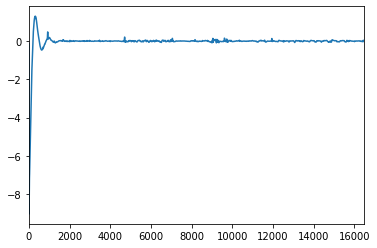

In [55]:
### rename column names 
titles = rawdata.columns
for t in titles:
    tempTile = t[0:6]
    # print(tempTile)
    rawdata.rename(columns={t:tempTile},inplace=True)
rawdata.describe()
rawdata['S1_D2_'].plot()

In [22]:
### read labels 
labels = []
labelFile = './data/labels_v1.csv'
labelData = pd.read_csv(labelFile, sep=",")
labelData.head()

,P,F1,F2,N1,N2,S1,S2,A1,A2
0,0,196,383,1226,1639,974,1168,476,702
1,3,662,845,908,1854,2118,2303,2387,2732
2,4,631,815,1041,1731,1937,2119,2181,2745
3,6,808,986,1060,1576,1754,1937,1974,2474
4,7,445,627,800,1352,1631,1817,1865,2129


In [23]:
### read row from labels 
singleLabel = labelData.loc[0]
print(singleLabel)

P        0
F1     196
F2     383
N1    1226
N2    1639
S1     974
S2    1168
A1     476
A2     702
Name: 0, dtype: int64


In [56]:
L1_start = singleLabel['F1']*10
L1_end = singleLabel['F2']*10
L2_start = singleLabel['S1']*10
L2_end = singleLabel['S2']*10
N_start = singleLabel['N1']*10
N_end = singleLabel['N2']*10
A_start = singleLabel['A1']*10
A_end = singleLabel['A2']*10


In [57]:

segs = [] # whole data
data = rawdata
# print(data.describe())
segs.append(data.loc[range(L1_start,L1_end)])  # learning 1
segs.append(data.loc[range(L2_start,L2_end)])  # learning 2
segs.append(data.loc[range(N_start,N_end)])  # Non
segs.append(data.loc[range(A_start ,A_end)])
# print(rawdata.describe())
print(segs[0].describe())



time       S1_D2_       S3_D2_       S4_D2_       S7_D7_  \
count  1870.000000  1870.000000  1870.000000  1870.000000  1870.000000   
mean    289.500000     0.000076    -0.000235    -0.000368    -0.000358   
std      53.998234     0.010564     0.009786     0.009938     0.013950   
min     196.000000    -0.029500    -0.037800    -0.032600    -0.039000   
25%     243.000000    -0.006480    -0.006788    -0.006520    -0.009832   
50%     289.500000    -0.000118    -0.000160     0.000378     0.000983   
75%     336.000000     0.005947     0.006388     0.007020     0.010900   
max     383.000000     0.045400     0.032200     0.021100     0.030100   

            S8_D7_       S10_D7       S1_D1_       S2_D1_       S3_D1_  ...  \
count  1870.000000  1870.000000  1870.000000  1870.000000  1870.000000  ...   
mean      0.000170    -0.001639    -0.000723    -0.000423    -0.000432  ...   
std       0.012251     0.016907     0.010148     0.010852     0.009467  ...   
min      -0.042000    -0.044800

In [58]:
### remove outliner 
fsegs = []

for k in range(0,4):
    tempSegs = segs[k][(np.abs(stats.zscore(segs[k])) < 3).all(axis=1)]
    fsegs.append(tempSegs)



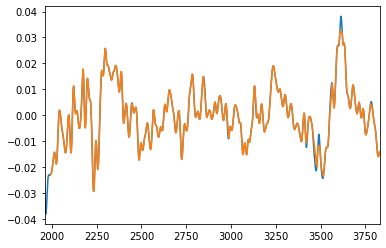

In [60]:
### plot 

segs[0]['S7_D5_'].plot()
fsegs[0]['S7_D5_'].plot()

In [77]:
L1_D = fsegs[0].describe()
L2_D = fsegs[1].describe()
N_D =  fsegs[2].describe()
A_D =  fsegs[3].describe()
L1_D.loc['mean'][1:13].plot()
L2_D.loc['mean'][1:13].plot()
N_D.loc['mean'][1:13].plot()
A_D.loc['mean'][1:13].plot()

frame = [L1_D,L2_D,N_D,A_D]
dataFrame = pd.concat(frame,keys=['L1','L2','Non','Ass'])
# print(dataFrame)
outFile = './preResults/'+ + str(participant)+'.csv'
dataFrame.to_csv(outFile)

time       S1_D2_       S3_D2_       S4_D2_       S7_D7_  \
L1  count  1678.000000  1678.000000  1678.000000  1678.000000  1678.000000   
    mean    287.455304    -0.000204     0.000173     0.000666     0.001152   
    std      52.778247     0.008947     0.008916     0.008599     0.012377   
    min     199.000000    -0.024600    -0.024000    -0.023000    -0.032000   
    25%     242.000000    -0.006197    -0.006290    -0.005647    -0.006892   
    50%     284.000000    -0.000105     0.000286     0.000804     0.001895   
    75%     331.000000     0.005318     0.006298     0.007100     0.011100   
    max     383.000000     0.029600     0.028900     0.021100     0.030100   
L2  count  1828.000000  1828.000000  1828.000000  1828.000000  1828.000000   
    mean   1072.541575     0.000517     0.001408     0.000321     0.000404   
    std      54.357590     0.017784     0.025935     0.016951     0.018121   
    min     975.000000    -0.052400    -0.076100    -0.048800    -0.059500   
    

TypeError: bad operand type for unary +: 'str'